# Визуализация.

Датасет представляет собой коллекцию медицинских и демографических данных пациентов, а также их статус диабета (положительный или отрицательный). Данные включают такие характеристики, как возраст, пол, индекс массы тела (ИМТ), гипертония, сердечно-сосудистые заболевания, история курения, уровень HbA1c и уровень глюкозы в крови. 

В будущем этот датасет может быть использован для построения моделей машинного обучения для прогнозирования диабета у пациентов на основе их истории болезни и демографической информации. Это может быть полезно для медицинских работников при выявлении пациентов, которые могут быть подвержены риску развития диабета, и при разработке персонализированных планов лечения.

Описание столбцов:

|Название| Описание |
|--|--|
|`gender`| Пол пациента |
|`age`| Возраст |
|`hypertension`| Гипертония —  это состояние, при котором кровяное давление в артериях постоянно повышено. Он принимает значения 0 или 1, где 0 означает отсутствие гипертонии, а 1 —  наличие гипертонии. |
|`heart_disease`| Болезни сердца —  это еще одно состояние, которое связано с повышенным риском развития диабета. Он также принимает значения 0 или 1, где 0 означает отсутствие сердечных заболеваний, а 1 —  наличие сердечных заболеваний. |
|`smoking_history`| Опыт курения —  также считается фактором риска развития диабета и может усугубить осложнения, связанные с диабетом. | 
|`bmi`| Это показатель количества жира в организме, основанный на весе и росте. Более высокие значения ИМТ связаны с повышенным риском развития диабета. Диапазон ИМТ в наборе данных составляет от 10,16 до 71,55. ИМТ менее 18,5 —  это недостаточный вес, 18,5-24,9 —  нормальный, 25-29,9 —  избыточный вес, а 30 и более —  ожирение. |
|`HbA1c_level`| Уровень HbA1c (гемоглобин A1c) —  это показатель среднего уровня сахара в крови человека за последние 2-3 месяца. Более высокий уровень указывает на больший риск развития диабета. В основном более 6,5% уровня HbA1c указывает на диабет. | 
|`blood_glucose_level`| Уровень глюкозы в крови —  это количество глюкозы в крови в определенный момент времени. Высокий уровень глюкозы в крови является основным признаком диабета. |
|`diabetes`| Диабет является целевой переменной (таргетом), при этом значение 1 указывает на наличие диабета, а 0 —  на его отсутствие. |

## Задание

Проведите визуализацию данных и попробуйте выяснить причины, от чего и с чем связаны основные причины наличия диабета у людей.

Ваша цель —  визуально с помощью графиков определить и доказать, что при наличии какого-либо фактора возможен риск развития диабета.

Этапы выполнения задания (наш pipeline):

1. Загрузка и предобработка данных (при необходимости)
2. Описательный анализ данных, просмотр данных
3. Построение гистограмм числовых переменных
4. Построение диаграмм размаха для определения наличия выбросов (ящики с усами) числовых переменных
5. Построение столбчатых диаграмм для категориальных переменных
6. Построение матрицы корреляции признаков (Phik или Пирсона)
7. Сравнение двух выборок
8. Общий вывод

## Загрузка данных

In [2]:
### импортируйте нужные библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import phik
from scipy import stats
import seaborn as sns
sns.set_theme()

In [3]:
# ваш код здесь
df = pd.read_csv("C:/Users/STELS/PycharmProjects/data_science_1t/task_1.5/diabetes_prediction_dataset.csv")

## Описательный анализ данных

Рассмотрите данные —  изучите медианы, средние, дисперсии и т.д. 

Что можете сказать о данных? Сделайте вывод.

In [4]:
# ваш код здесь
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [7]:
df.duplicated().sum()

3854

In [8]:
## К'2-тест Д'Агостино
test = [df.age, df.hypertension, df.heart_disease, df.bmi, df.HbA1c_level, df.blood_glucose_level, df.diabetes]
for data in test:
    _, pvalue = stats.normaltest(data)
    alpha = 0.05
    print(data.name + ": ")
    if pvalue < alpha:
        print(f'P-value:{pvalue:.5f}. выборка имеет распределение по Гауссу.')
    else:
        print(f'P-value:{pvalue:.5f}. выборка не имеет распределения по Гауссу.')

age: 
P-value:0.00000. выборка имеет распределение по Гауссу.
hypertension: 
P-value:0.00000. выборка имеет распределение по Гауссу.
heart_disease: 
P-value:0.00000. выборка имеет распределение по Гауссу.
bmi: 
P-value:0.00000. выборка имеет распределение по Гауссу.
HbA1c_level: 
P-value:0.00000. выборка имеет распределение по Гауссу.
blood_glucose_level: 
P-value:0.00000. выборка имеет распределение по Гауссу.
diabetes: 
P-value:0.00000. выборка имеет распределение по Гауссу.


**Вывод:**
1. Данные не содержат пропусков.
2.В данных содержится 3854 явных дубликата.
3. В колонке smoking_history имеются значения former и not current, которые по сути являются дубликатами.
4. Выборки age, hypertension, heart_disease, bmi, HbA1c_level, blood_glucose_level, diabetes имеют нормальное распределение (распределение по Гауссу).
5. Данные имеют верный формат.
6. Средний возраст исследуемых - 42-43 года.
7. 

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004

## Предобработка данных

### Дубликаты

Предобработайте датасет —  проверьте на наличие дубликатов и удалите, если они есть.

In [9]:
# ваш код здесь
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)

3854


In [10]:
#Испралвяем дублирование former и not current
df.loc[df['smoking_history'] == 'not current', 'smoking_history'] = 'former'
df.smoking_history.value_counts()

smoking_history
never      34398
No Info    32887
former     15666
current     9197
ever        3998
Name: count, dtype: int64

In [11]:
#Избавляемся от "Европейских ценностей"
df.gender.value_counts() #18
df = df.loc[df.gender != 'Other']
df.gender.value_counts()

gender
Female    56161
Male      39967
Name: count, dtype: int64

### Отсутствующие значения

Предобработайте датасет — проверьте на наличие NaN и удалите или заполните значения.

In [12]:
# ваш код здесь
#Пропуски данных отсутствуют.

### Изменение типа данных

Рассмотрев все данные, замените типы на нужные (при необходимости):

- Если есть числа — на `int` или `float`
- Если категории — можно оставить `object`

In [13]:
# ваш код здесь
#Изменение типов данных не требуется
#Приводим индексы в порядок
df.reset_index(drop=True, inplace=True)
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
96123,Female,36.0,0,0,No Info,24.60,4.8,145,0
96124,Female,2.0,0,0,No Info,17.37,6.5,100,0
96125,Male,66.0,0,0,former,27.83,5.7,155,0
96126,Female,24.0,0,0,never,35.42,4.0,100,0


**Вывод:**
Данные исправлены и подготовлены к дальнейшей работе

## Визуализация

Построим графики:

1. Построение гистограмм числовых переменных
2. Построение диаграмм размаха для определения наличия выбросов (ящики с усами) числовых переменных
3. Построение столбчатых диаграмм для категориальных переменных
4. Построение матрицы корреляции признаков (Phik или Пирсона)

После построения опишите выборку. Что она из себя представляет? Есть ли зависимости?

In [14]:
# ваш код здесь
#1. Построение гистограмм числовых переменных
fig = px.histogram(df, x="age")
fig.update_layout(bargap=0.01) #bargap позволяет разъеденить столбцы друг от друга
fig.show()

Из полученной гистограммы отчетливо видно значительное количество пациентов (4932), возраст которых находится в пределах от 79,75 до 80,24. Очевидно, что это выброс и его необходимо исправить.

In [19]:
df = df.loc[df.age <= 79.24]
fig = px.histogram(df, x="age")
fig.update_layout(bargap=0.01) #bargap позволяет разъеденить столбцы друг от друга
fig.show()

In [23]:
df.hist(figsize=(10,10));

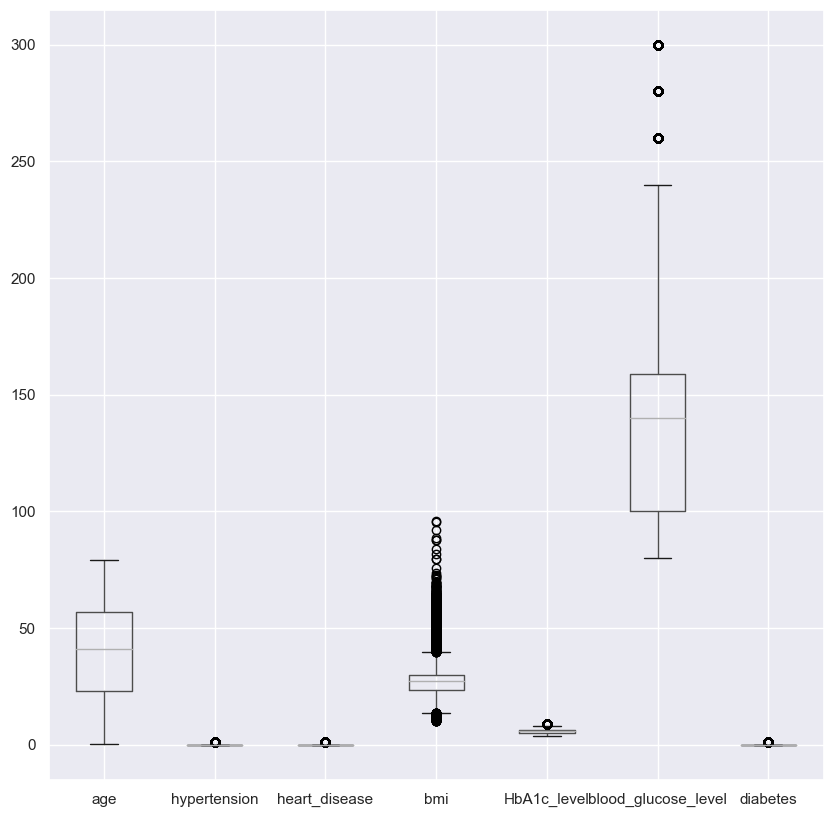

In [20]:
#2. Построение диаграмм размаха для определения наличия выбросов (ящики с усами) числовых переменных
df.boxplot(figsize=(10,10));

После изучения полученных графиков следует удалить из датафрейма выявленные выбросы: bmi > 50


In [ ]:
df = df.loc[df.bmi <= 50]

In [ ]:
#3. Построение столбчатых диаграмм для категориальных переменных
tmp = df['smoking_history'].value_counts()
plt.figure(figsize=(5,5))
plt.title('Smoking history')
plt.bar(tmp.index, height=tmp.values)
plt.xticks(tmp.index)
plt.show()

In [ ]:
#4. Построение матрицы корреляции признаков (Phik или Пирсона)
df.phik_matrix()

**Вывод:**
Из полученной матрицы корреляции признаков можно увидеть, что целевая переменная diabetes зависит от возраста пациента, наличия у пациента гипертонии и сердечных заболеваний, уровеня гемоглобина, уровня сахара в крови, а так же прослеживается некоторая зависимость от наличия у пациента ожирения и вредных привычек.

## Сравнение выборок

После построения всех типов графиков, необходимо провести анализ:

Отобразите на одном графике две выборки — люди с диабетом и без и сравните их.

1. Для числовых признаков — гистограммы и ящики с усами.
2. Для категориальных — столбчатые диаграммы.

После напишите вывод, есть ли какая-то зависимость?

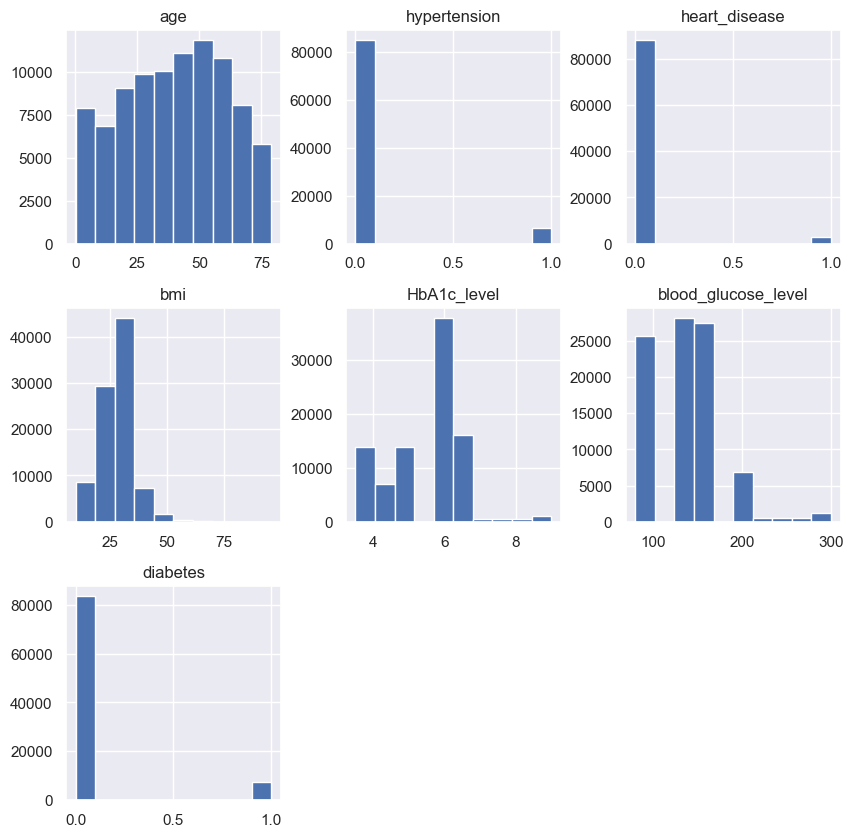

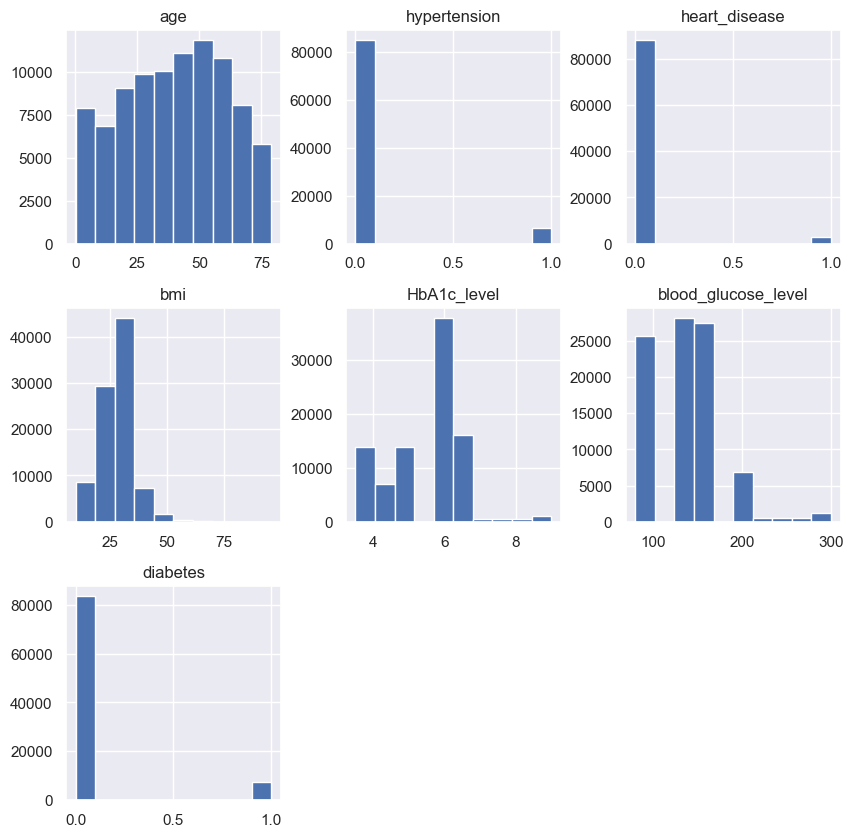

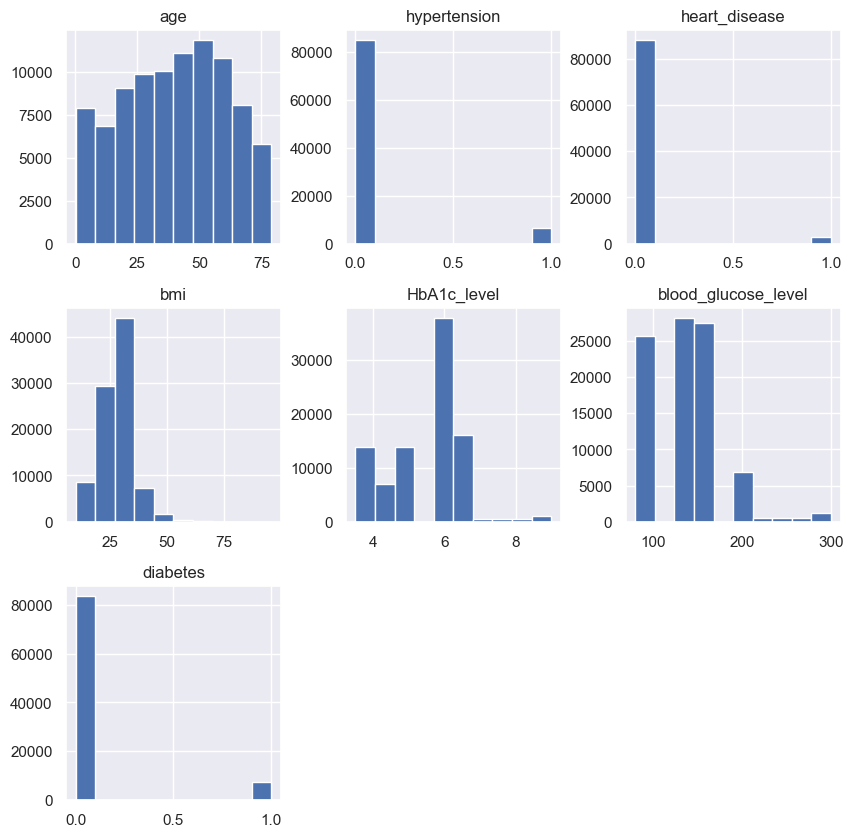

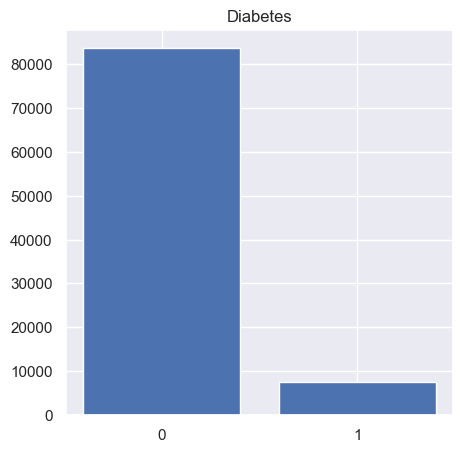

In [24]:
# ваш код здесь
tmp_d = df['diabetes'].value_counts()
plt.figure(figsize=(5,5))
plt.title('Diabetes')
plt.bar(tmp_d.index, height=tmp_d.values)
plt.xticks(tmp_d.index)
plt.show()

In [ ]:
sns.countplot(x="sex", data=titanic_df, hue='survived')

In [ ]:
pd.plotting.scatter_matrix(df, figsize=(7,7));

**Вывод:**
Различные графики позволяют представить данные в более наглядном виде и выявить различные зависимости.


## ЗАДАЧИ PRO

Мы провели базовый анализ выше и сделали выводы.

Но даёт ли этот результат полную картину? Наша цель — узнать, каков риск возникновения диабета у пациента.

Ваша задача — воспользоваться ранее приобретенными навыками и дополнить общий вывод. 

**Этапы:**

1) Разделите выборки и постройте дополнительные графики. Может стоит разделить на несколько выборок и сравнить графики там?
2) Постройте `pairplot` с параметром `hue=='diabetes'`. Может там тоже где-то кроется истина?
3) Постройте тепловую карту корреляции `Phik` и сделайте дополнительный вывод.
4) Дополните общий вывод. 

**Примечание:** задание не ограничено только этими этапами. Можно их дополнить — может стоит сделать фильтр данных, рассмотреть данные под другим углом и провести дополнительную аналитику? Средствами и методами не ограничены.

In [ ]:
# Постройте `pairplot` с параметром `hue=='diabetes'`. Может там тоже где-то кроется истина?
sns.pairplot(df, corner=True, hue='diabetes');

In [ ]:
#Постройте тепловую карту корреляции `Phik` и сделайте дополнительный вывод.

tmp = df.sample(1000).phik_matrix()

plt.figure(figsize=(7,7))
sns.heatmap(tmp, annot=True, cmap='Greens')
plt.imshow(tmp)
plt.show()

In [ ]:
numeric_df = titanic_df[['survived','pclass','age','sibsp','parch']] # Выберем только числовые столбцы
sns.heatmap(numeric_df.corr(),annot=True) # 

# Общий вывод

Опишите данные и результат исследования, основываясь на предыдущих шагах: